#  DSC530-T304 Data Exploration and Analysis - Week 4 #

## Probability Mass Functions and Cumulative Distribution Functions ##

### Excercise Chapter 3 ###
-----

In [1]:
# Download pregency and respondent data files from thinkstat

from os.path import basename, exists

# Declare a function to download the files to local
def download(fileurl):
    filename = basename(fileurl)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(fileurl, filename)
        print("Downloaded " + local)
        

In [2]:
# Dowload the python and data files to load pregnency and respondent data 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

In [4]:
# import the script to laod data
import nsfg
import first
import thinkstats2
import thinkplot

**Excercise chapter 3 - 1**

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

In [5]:
# Read the respondent file
respdnt_df = nsfg.ReadFemResp()
respdnt_df.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


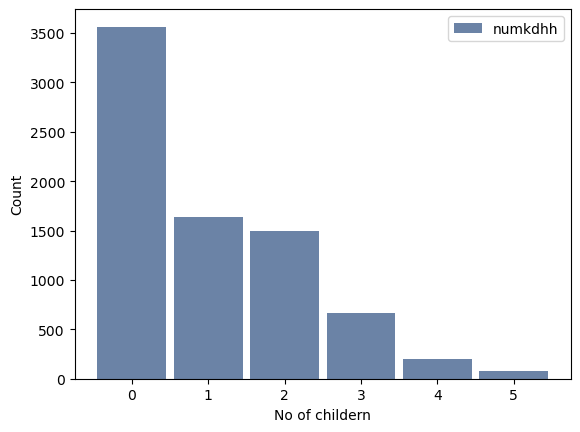

In [6]:
# Plot the number of childern histrogram to view the frequency of the values
hist = thinkstats2.Hist(respdnt_df.numkdhh, label="numkdhh")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="No of childern", ylabel="Count")

In [7]:
# Create a PMF using the number of childerns under the age 18
undr18_pmf = thinkstats2.Pmf( respdnt_df.numkdhh, label='UnBiasedUnder18')
undr18_pmf.Values

<bound method _DictWrapper.Values of Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'UnBiasedUnder18')>

In [8]:
# Create a copy of the PMF
undr18_bias_pmf = undr18_pmf.Copy(label = "BiasedUnder18")

In [9]:
# Modify the probability of # of children value of each record 
for val, prob in undr18_pmf.Items():
    undr18_bias_pmf.Mult(val, val)

# Normalize after modifying all the probabilties
print('Biased PMF Total Probaility Before Normalization' , undr18_bias_pmf.Total() )    
undr18_bias_pmf.Normalize()
print('Biased PMF Total Probaility After Normalization' , undr18_bias_pmf.Total() )   

Biased PMF Total Probaility Before Normalization 1.024205155043831
Biased PMF Total Probaility After Normalization 1.0


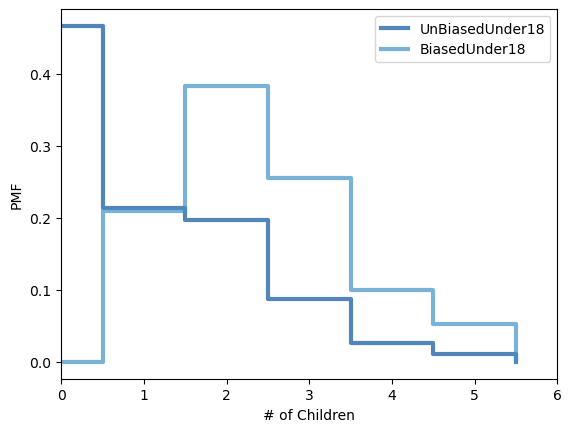

In [10]:
# Ploit both PMF
thinkplot.PrePlot(2)
thinkplot.Pmfs([undr18_pmf, undr18_bias_pmf])
thinkplot.Config(xlabel="# of Children", ylabel="PMF", xlim=[0, 6])

In [11]:
# Print mean of both unbiased and biased PMF
print("Un Biased under 18 childeren PMF mean : ", undr18_pmf.Mean() )
print("Biased under 18 childeren PMF mean    : ", undr18_bias_pmf.Mean() )

Un Biased under 18 childeren PMF mean :  1.024205155043831
Biased under 18 childeren PMF mean    :  2.403679100664282


**Excercise chapter 3 - 1**

In Section 2.7 we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:

x = ∑  pi xi<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i     

where the xi are the unique values in the PMF and pi=PMF(xi). Similarly, you can compute variance like this:
    
S2 = ∑ pi (xi − x)2<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i
 
Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [12]:
# Function named PmfMean  -  PMF mean is calcuated by summing the product of individual element and its probability
def PmfMean( pmf):
    return sum(val * prob for val, prob in pmf.Items())

In [13]:
# Function named PmfVar  -  PMF variance  is calcuated by summing the product of individual element and its variance

def PmfVar( pmf ):
    pmf_mean = PmfMean(pmf)
    # Variance of a individual element -  subtract the mean from it and square the result.  Square(val - mean) 
    return sum(prob * (val - pmf_mean)**2 for val, prob in pmf.Items())

In [14]:
print("Mean from PMF : " , undr18_pmf.Mean() , "  & Mean from Function PmfMean : ", PmfMean( undr18_pmf ))

Mean from PMF :  1.024205155043831   & Mean from Function PmfMean :  1.024205155043831


In [15]:
print("Variance from PMF : " , undr18_pmf.Var() , "  & Variance from Function PmfMean : ", PmfVar( undr18_pmf ))

Variance from PMF :  1.4128643263531195   & Variance from Function PmfMean :  1.4128643263531195


### Excercise Chapter 4 ###
-----

**Exercise 4 - 1**

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [16]:
# Load Pregency data in a Dataframe
preg_df = nsfg.ReadFemPreg()
preg_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [17]:
# Filter only live birth records
live_birth = preg_df[preg_df.outcome == 1]

# Filter and split the pregnancy dataframe
# filter the live birth records and split by first baby or subsequent baby
firsts = live_birth[live_birth.birthord == 1]
others = live_birth[live_birth.birthord != 1]

In [18]:
# create CDF for first birth baby 
first_baby_wt_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='First Baby wt')
subseqnt_baby_wt_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='Subsequent Baby wt')

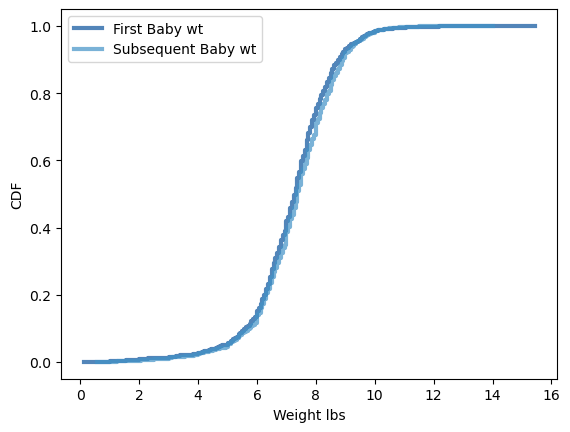

In [19]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_baby_wt_cdf, subseqnt_baby_wt_cdf])
thinkplot.Config(xlabel='Weight lbs', ylabel='CDF')

In [20]:
# Identifying the percentile of my weight against first born babay weights
print("Percentile rank of my birth weight,  6.81 lbs, among first born babies is ", first_baby_wt_cdf.PercentileRank(6.81))

Percentile rank of my birth weight,  6.81 lbs, among first born babies is  34.31125372450149


In [21]:
# Identifying the percentile of my weight against first born babay weights
print("Percentile rank of my birth weight,  6.81 lbs,  among other than first born babies is  ", subseqnt_baby_wt_cdf.PercentileRank(6.81))

Percentile rank of my birth weight,  6.81 lbs,  among other than first born babies is   30.99465240641711


**Exercise 4-2**

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [22]:
import numpy as np
# generate 100 random numbers using numpy 
rndm_1000_num = np.random.random(1000)

In [23]:
# create a PMF of the random numbers
rndm_1k_num_pmf = thinkstats2.Pmf( rndm_1000_num, label='1k random number pmf')

In [24]:
# create a CDF of random numbers
rndm_1k_num_cdf = thinkstats2.Cdf(rndm_1000_num, label='1k random number cdf')

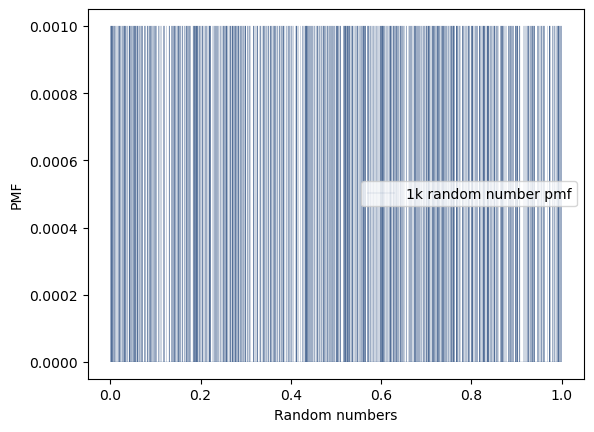

In [25]:
# Plot the pdf values
thinkplot.Pmf(rndm_1k_num_pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random numbers', ylabel='PMF')

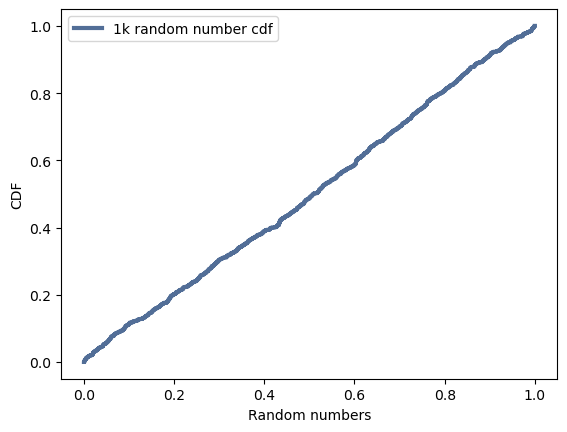

In [26]:
# Plot the CDF values
thinkplot.Cdf(rndm_1k_num_cdf)
thinkplot.Config(xlabel='Random numbers', ylabel='CDF')

The CDF plot is approximatley a straight line indicating uniform distribution

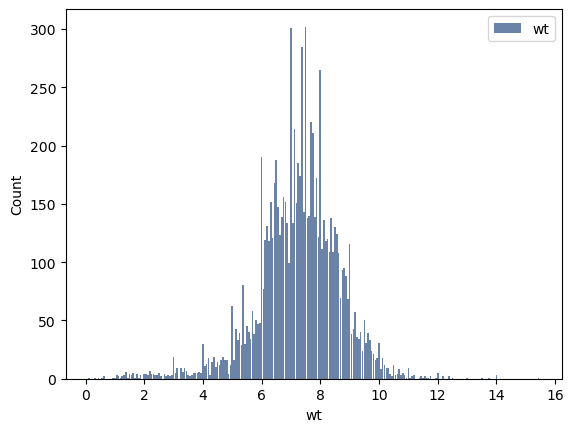

In [30]:
data1 = live_birth.totalwgt_lb.dropna()
hist1 = thinkstats2.Hist(data1, label="wt")
thinkplot.Hist(hist1)
thinkplot.Config(xlabel="wt", ylabel="Count")